<div style="background-color: #0d1117; color: #c9d1d9; padding: 20px; font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Helvetica, Arial, sans-serif;">

# 🔒 JavaScript Closures: The Ultimate Guide

Welcome to the deep dive into one of JavaScript's most powerful (and misunderstood) features. 

### 🎯 What You'll Learn
1. **The Concept:** What actually *is* a closure? (Hint: It's like a backpack).
2. **Memory Model:** Stack vs. Heap behaviors.
3. **Real-world Uses:** Privacy and Factories.
4. **The Interview Trap:** The infamous `for` loop question.

---

<div style="background-color: #0d1117; color: #c9d1d9; font-family: sans-serif;">

## 1. What is a Closure? 📦

In simple terms, a closure is a function that remembers its **roots**. Even if a function is executed outside its original scope, it can still access variables from where it was defined.

<div style="background-color: #161b22; border-left: 5px solid #58a6ff; padding: 15px; margin: 20px 0; border-radius: 0 5px 5px 0;">
    <h3 style="color: #58a6ff; margin-top: 0;">🧪 The Formula</h3>
    <p style="font-size: 1.2em;">
        <strong>Closure</strong> = <strong>Function</strong> + <strong>Lexical Environment</strong> (Surrounding State)
    </p>
</div>

### Pure Function vs. Closure

| Feature | Pure Function | Closure |
| :--- | :--- | :--- |
| **Dependencies** | Only its own arguments | Arguments + **Outer Variables** |
| **Memory** | Call Stack (Short-lived) | **Heap** (Long-lived) |
| **Analogy** | A Calculator | A Backpack referencing items at home |

</div>

<div style="background-color: #0d1117; color: #c9d1d9; font-family: sans-serif;">

## 2. Under the Hood: Stack vs. Heap 🧠

When a normal function runs, it lives on the **Stack**. Once it returns, it pops off, and its local variables are destroyed.

**But wait!** If an inner function references an outer variable, the JavaScript engine says: *"Hold on, we might need this later!"* and moves that data to the **Heap**.

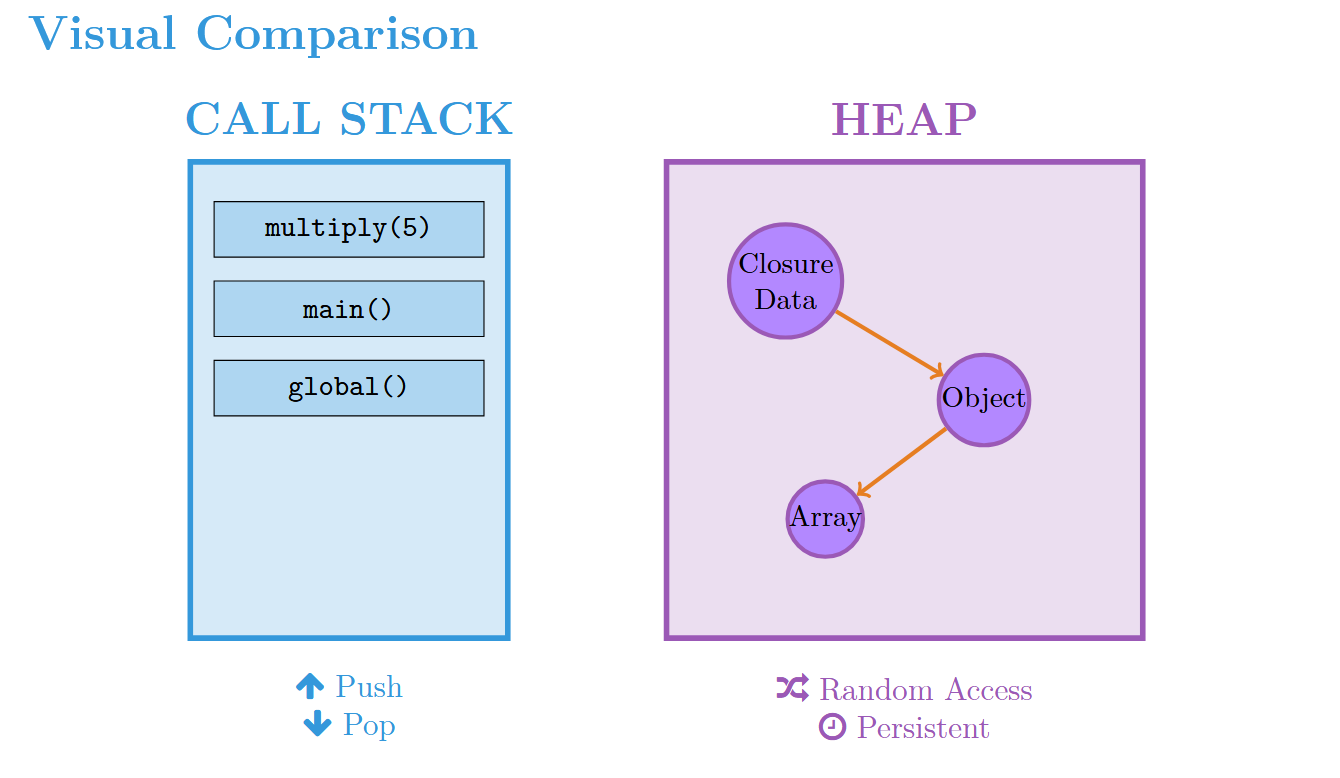

> 💡 **Tip:** This is why closures consume more memory. The Garbage Collector (GC) cannot clean up these variables as long as the closure exists.

</div>

<div style="background-color: #0d1117; color: #c9d1d9; font-family: sans-serif;">

## 3. Why Use Closures? 🛠️

### A. Data Encapsulation (Privacy)
Prevents global variables from being corrupted. Only the inner function can touch the variable.

```javascript
function createCounter() {
    let count = 0; // 🔒 Private variable
    
    return {
        increment: function() {
            count++;
            return count;
        }
    };
}

const myCounter = createCounter();
console.log(myCounter.count);      // undefined (Can't touch this!)
console.log(myCounter.increment()); // 1 (Access granted via closure)
```

### B. Function Factories
Create specific functions from a generic blueprint.

```javascript
function multiplier(factor) {
    return function(number) {
        return number * factor;
    };
}

const double = multiplier(2);
const triple = multiplier(3);

console.log(double(5)); // Output: 10
console.log(triple(5)); // Output: 15
```

</div>

<div style="background-color: #0d1117; color: #c9d1d9; font-family: sans-serif;">

## 4. The Interview Trap ⚠️

This is the #1 trick question in JS interviews. What does this code log?

```javascript

for (var i = 0; i < 3; i++) {
  const log = function () {
    console.log(i);
  };

  setTimeout(log, 100);
}

```

<div style="background-color: #161b22; border: 1px solid #f85149; padding: 10px; border-radius: 5px; color: #f85149; margin-bottom: 20px;">
    <strong>❌ Expectation:</strong> 0, 1, 2<br>
    <strong>🛑 Reality:</strong> 3, 3, 3
</div>

### Why?
1. `var` is **function scoped** (or global), not block scoped.
2. The loop runs extremely fast. By the time 100ms passes, `i` is already `3`.
3. The closure captured the **reference** to `i`, not the value at that moment.

### Architecture of the Failure

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background-color: #161b22; color: #f85149; padding: 15px; border: 1px solid #30363d; border-radius: 6px;">
 GLOBAL SCOPE (Memory)
┌──────────────────────────────┐
│  Variable i = 3              │ ◄── Only ONE variable exists!
└──────┬───────┬───────┬───────┘
       │       │       │
       │       │       │ (Wait 100ms...)
       │       │       │
    ┌──┴──┐ ┌──┴──┐ ┌──┴──┐
    │ Log │ │ Log │ │ Log │
    └─────┘ └─────┘ └─────┘
     Print   Print   Print
       3       3       3
</pre>

</div>

### Why `setTimeout(log, 100)` doesn't block the loop

**Key idea:**  
`setTimeout` does **not** pause or block execution.  
It simply **schedules** the `log` function to run **100ms later** and then the loop continues immediately.

---

### What actually happens

| Step | Action | `i` value |
|---|---|---|
| 1 | Schedule `log` for 100ms later | `i = 0` |
| 2 | Schedule `log` for 100ms later | `i = 1` |
| 3 | Schedule `log` for 100ms later | `i = 2` |
| Loop ends | Finished | `i = 3` |
| After 100ms | All logs execute | prints `3, 3, 3` |

---

### Reason for output `3 3 3`

- With `var`, there is **one shared `i`**
- When the timeout callbacks run, the loop is already finished
- Final value of `i` is `3`, so all callbacks see `3`

---

### If we used `let`



Output:

```
0
1
2
```

Because `let` gives each iteration its **own** `i`.

---



<div style="background-color: #0d1117; color: #c9d1d9; font-family: sans-serif;">

## 5. The Solution: `let` it be ✅

Changing `var` to `let` fixes everything.

```javascript

for (let i = 0; i < 3; i++) {
  const log = function () {
    console.log(i);
  };

  setTimeout(log, 100);
}


// Output: 0, 1, 2
```

<div style="background-color: #161b22; border-left: 5px solid #3fb950; padding: 15px; margin: 20px 0;">
    <h4 style="color: #3fb950; margin: 0;">✨ Magic of `let`</h4>
    `let` creates a new <strong>Block Scope</strong> for each iteration of the loop. It creates a brand new variable binding in memory every time the loop runs.
</div>

### Architecture of the Success

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background-color: #161b22; color: #3fb950; padding: 15px; border: 1px solid #30363d; border-radius: 6px;">
 MEMORY (Block Scopes)

  Iteration 1       Iteration 2       Iteration 3
┌─────────────┐   ┌─────────────┐   ┌─────────────┐
│  i = 0      │   │  i = 1      │   │  i = 2      │
└──────┬──────┘   └──────┬──────┘   └──────┬──────┘
       │                 │                 │
    ┌──┴──┐           ┌──┴──┐           ┌──┴──┐
    │ Log │           │ Log │           │ Log │
    └─────┘           └─────┘           └─────┘
     Print             Print             Print
       0                 1                 2
</pre>

</div>

<div style="background-color: #0d1117; color: #c9d1d9; font-family: sans-serif;">

## 6. Quick Revision & Tricks 🚀

### 🔎 How to Debug
1. Open Chrome DevTools.
2. Add `debugger;` inside your inner function.
3. Check the **Scope** tab.
4. Look for **Closure (OuterFunction)**.

### 📝 Summary Table

| Concept | Key Takeaway |
| :--- | :--- |
| **Closure** | Inner function + Outer variables |
| **Heap** | Where closure variables live (survive GC) |
| **Var in Loop** | Shares ONE variable (Buggy for async) |
| **Let in Loop** | Creates NEW variable per loop (Safe) |

### 🧠 One-Liners to Memorize
*   "A closure is a backpack of data that a function carries around."
*   "Use `let` to get a fresh variable for every loop iteration."

</div>